In [1]:
import tensorflow as tf
from tensorflow import keras

/Users/zhangjianfeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.12.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

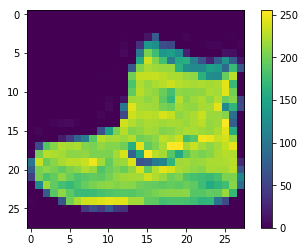

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

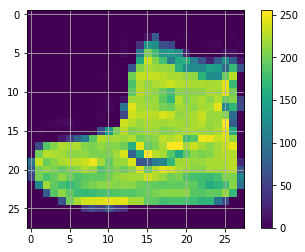

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)

In [15]:
#将数据值缩放到0到1 之间，才可以传输给神经网络模型
train_images = train_images /255.0
test_images = test_images/255.0

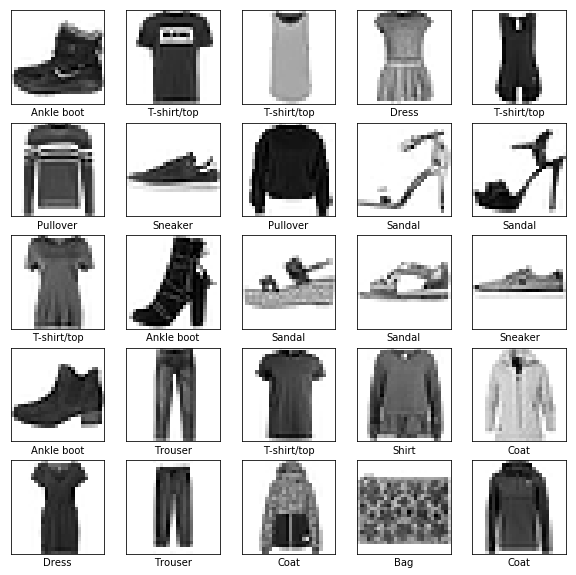

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

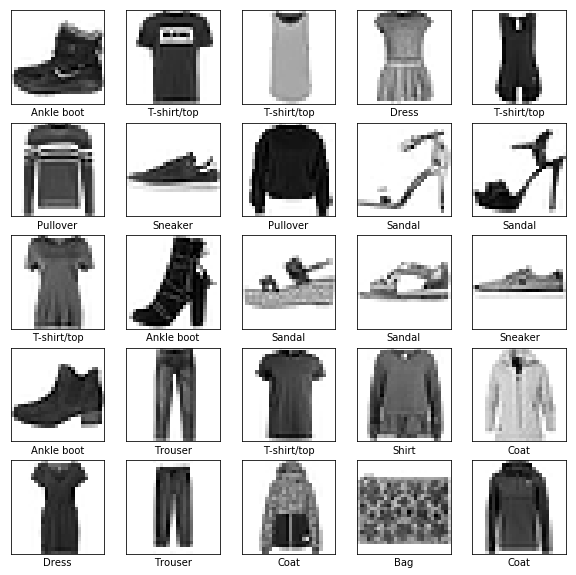

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])

In [22]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 1.6978 - acc: 0.5434
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 1.6200 - acc: 0.5693
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 1.5487 - acc: 0.5889
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 1.4830 - acc: 0.6061
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 1.4233 - acc: 0.6203


In [24]:
test_lostt,test_acc = model.evaluate(test_images,test_labels)
print('accuracy:',test_acc)

10000/10000 [==============================] - 0s 22us/step
accuracy: 0.6234


In [25]:
predictions = model.predict(test_images)

In [26]:
predictions

array([[0.04125414, 0.02993287, 0.05586554, ..., 0.1532574 , 0.11334568,
        0.30838376],
       [0.04432616, 0.00834762, 0.23998022, ..., 0.01751666, 0.10579345,
        0.04996782],
       [0.08606119, 0.6040677 , 0.0319345 , ..., 0.02391778, 0.02656891,
        0.03942335],
       ...,
       [0.1994493 , 0.05356891, 0.07554695, ..., 0.0229186 , 0.13309892,
        0.07141634],
       [0.08211634, 0.3309378 , 0.03582484, ..., 0.05829724, 0.02709261,
        0.07504009],
       [0.05789169, 0.04619775, 0.11216021, ..., 0.12043579, 0.15286365,
        0.1614361 ]], dtype=float32)

In [27]:
predictions[0]

array([0.04125414, 0.02993287, 0.05586554, 0.04357784, 0.06846219,
       0.11978774, 0.06613287, 0.1532574 , 0.11334568, 0.30838376],
      dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [30]:
np.argmax(np.array([1, 2, 3, 4]))

3

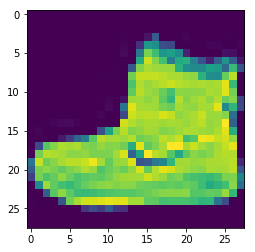

In [34]:
# plt.figure()
plt.imshow(train_images[0])
# plt.colorbar()
plt.grid(False)

In [35]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
# 用红蓝标示分类错误和正确
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [38]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

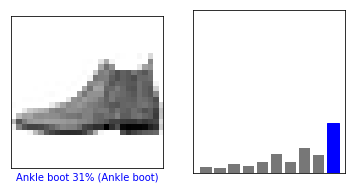

In [39]:
#展示第0张图片
i= 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

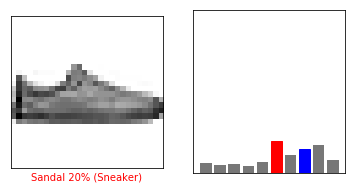

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

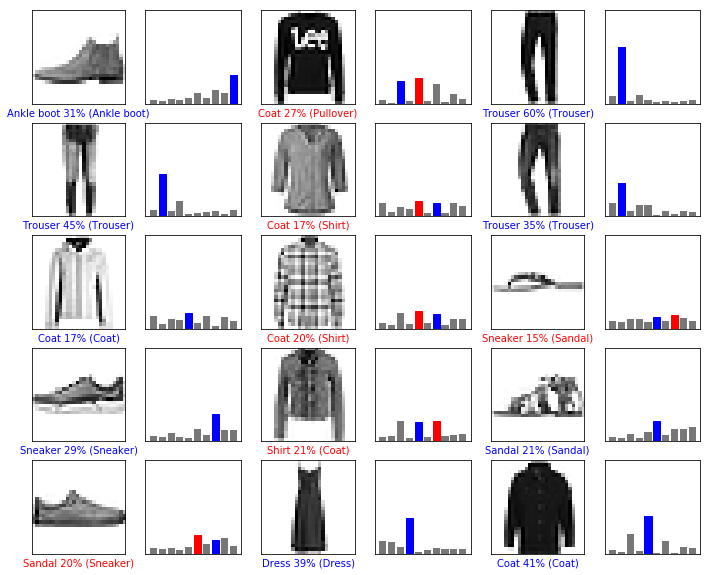

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions, test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, test_labels)

In [43]:
img = test_images[0]

In [44]:
print(img.shape)

(28, 28)


In [45]:
img = np.expand_dims(img,0)

In [46]:
img.shape

(1, 28, 28)

In [48]:
preictions_single = model.predict(img)

In [49]:
preictions_single

array([[0.04125414, 0.02993287, 0.05586552, 0.04357783, 0.06846216,
        0.11978775, 0.06613289, 0.1532574 , 0.11334565, 0.3083837 ]],
      dtype=float32)

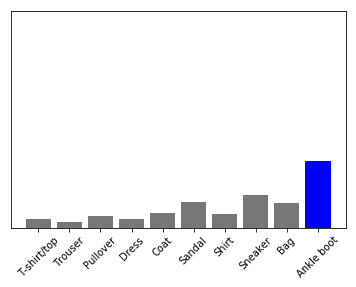

In [52]:
plot_value_array(0,preictions_single,test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [54]:
np.argmax(preictions_single[0])

9